The **coronavirus (COVID-19)** pandemic is the greatest global humanitarian challenge the world has faced since World War II. The pandemic virus has spread widely, and the number of cases is rising daily. The government is working to slow down its spread.

Till date it has spread across 215 countries infecting 5,491,194 people and killing 346,331 so far. In India, as many as 138,536 COVID-19 cases have been reported so far. Of these, 57,692 have recovered and 4,024 have died. 
COVID19 


---





**Corona Virus Explained in Simple Terms:**
- Let's say Raghav got infected yesterday, but he won't know it untill next 14 days
- Raghav thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

![alt text](https://i.imgur.com/nf2kMhF.jpg)


---



##Problem Statement:


India has responded quickly, implementing a proactive, nationwide, lockdown, to flatten the curve and use the time to plan and resource responses adequately. As of 23rd May 2020, India has witnessed 3720 deaths from 32 States and Union Territories, with a total of 123202 confirmed cases due to COVID-19. Globally the Data Scientists are using AI and machine learning to analyze, predict, and take safety measures against COVID-19 in India. 


---


### Goal:
We need a explore the COVID situation in India and the world, and strong model that predicts how the virus could spread across India in the next 15 days.


---



###Tasks to be performed:
- Analyze the present condition in India
- Scrape out the COVID-19 from websites
- Figure out the death rate and cure rate per 100 across the affected states
- Create different charts to visualize the following: 
 - Age group distribution of affected patients
 - Total sample test done till date
 - Growth rate of COVID in top 15 states
 - Top 10 States in each health facility
 - State wise testing insight
- ICMR testing centres in each state
- Use Prophet to predict the confirmed cases in India
- Use ARIMA to predict the confirmed cases in India
- Compare the Indian COVID cases globally



---

# Sequence of steps as they are to create a time series model to predict covid19:
- web scrapping (getting raw data) using Selenium, Beautiful soup, Chromium
- clean the data using pandas
- data visualization using matplotlib, seaborn, folium
- model the data ( time series models) using Prophet and Arima
- evaluate the model, predict the future using it

###Importing the required libraries

In [ ]:
# importing the required libraries
#cleaning data library
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Part 1: Analysing the present condition in India


**How it started in India?:** 

The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting **25** states, till now *(Bihar and Manipur being the most recent)*. Here is a brief timeline of the cases in India.
###COVID-19 in India - Timeline
 <br>


![](https://i.imgur.com/iEgxlkm.png)

##Recent COVID-19 updates in India

- Sikkim on Saturday reported its first +ve COVID-19 case
- With over 6,500 fresh cases, the Covid in India rose to 1,25,101 on Saturday morning, with 3,720 fatalities
- West Bengal asks Railways not to send migrant trains to State till May 26 in view of Cyclone Amphan
- 196 new COVID 19 positive cases were reported in Karnataka on Saturday
- Complete lockdown in Bengaluru on Sunday. 
 - Bruhat Bengaluru Mahanagara Palike (BBMP) Commissioner B.H. Anil Kumar said the conditions and restrictions on Sunday will be similar to that under coronavirus lockdown 1.0.


## How is AI-ML useful in fighting the COVID-19 pandemic?
- Medical resource optimization
- Ensuring demand planning stability
- Contact tracing 
- Situational awareness and critical response analysis


## 1.1 Scraping the datasets from the [official Govt. website](https://www.mohfw.gov.in)


In [ ]:
# Boilerplate to run browser automation tool selenium on colab
# We need to install selenium and update ubuntu so that we can install chromium-chromedriver
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
# Web automation tool in selenium to run tests against different browsers. Here, we will use this to fetch website
# The chrome options tell the web driver that we want to run browser:
# - Without GUI i.e. headless
# - Just want to fetch webpage so we don't need sandbox mode
# To avoid crashes due to shared memory issues we use disable-dev-shm-usage
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,112 kB]
Get:15 htt

In [ ]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for scraping web contents
from bs4 import BeautifulSoup

In [ ]:
# setup webdriver
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

In [ ]:
import time

In [ ]:
# get web data
#using chromium and selenium driver , the source page HTML code of the given website is downloaded here 
wd.get('https://www.mohfw.gov.in/')
time.sleep(10)

In [ ]:
# parse web data
#for understanding data from HTML code
soup = BeautifulSoup(wd.page_source)

In [ ]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.table.tbody
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [ ]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [ ]:
# Before we define column names we have check the header
head_rows

[[],
 ['S. No.',
  'Name of State / UT',
  'Active Cases*',
  'Cured/Discharged/Migrated*',
  'Deaths**'],
 ['Total',
  'Change since yesterdayChange since yesterday',
  'Cumulative',
  'Change since yesterday',
  'Cumulative',
  'Change since yesterday']]

In [ ]:
head_rows[2][0]=head_rows[2][0]+' '+head_rows[1][2]
head_rows[2][1]=head_rows[1][2]+head_rows[2][1][6:22]
head_rows[2][2]=head_rows[2][2]+' '+head_rows[1][3]
head_rows[2][3]=head_rows[1][3]+head_rows[2][3][6:]
head_rows[2][4]=head_rows[2][4]+' '+head_rows[1][4]
head_rows[2][5]=head_rows[1][4]+head_rows[2][5][6:]

In [ ]:
cols=head_rows[1][:2]+head_rows[2]

In [ ]:
# save contents in a dataframe
# ============================
import pandas as pd    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-5], columns=cols)

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(36)

,Name of State / UT,Total Active Cases*,Active Cases* since yesterday,Cumulative Cured/Discharged/Migrated*,Cured/Discharged/Migrated* since yesterday,Cumulative Deaths**,Deaths** since yesterday
0,Andaman and Nicobar Islands,199,1,3782,12,55,
1,Andhra Pradesh,42855,1128,714427,5715,6291,35
2,Arunachal Pradesh,2960,20,9573,170,28,4
3,Assam,28897,458,167059,1020,830,4
4,Bihar,10835,166,187059,1148,961,6
5,Chandigarh,1127,43,12007,109,197,5
6,Chhattisgarh,27208,213,119352,2812,1306,20
7,Dadra and Nagar Haveli and Daman and Diu,85,17,3081,17,2,
8,Delhi,21490,955,286880,2036,5854,45
9,Goa,4316,149,34252,554,514,3


# Data Cleaning

In [ ]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

In [ ]:
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Cumulative Deaths**'] = df_India['Cumulative Deaths**'].str.replace('#', '')

In [ ]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

df_India.head(36)


,Name of State / UT,Total Active Cases*,Active Cases* since yesterday,Cumulative Cured/Discharged/Migrated*,Cured/Discharged/Migrated* since yesterday,Cumulative Deaths**,Deaths** since yesterday,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,199,1,3782,12,55,,2020-10-14,11.7401,92.6586
1,Andhra Pradesh,42855,1128,714427,5715,6291,35,2020-10-14,15.9129,79.7400
2,Arunachal Pradesh,2960,20,9573,170,28,4,2020-10-14,28.2180,94.7278
3,Assam,28897,458,167059,1020,830,4,2020-10-14,26.2006,92.9376
4,Bihar,10835,166,187059,1148,961,6,2020-10-14,25.0961,85.3131
5,Chandigarh,1127,43,12007,109,197,5,2020-10-14,30.7333,76.7794
6,Chhattisgarh,27208,213,119352,2812,1306,20,2020-10-14,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,85,17,3081,17,2,,2020-10-14,NaN,NaN
8,Delhi,21490,955,286880,2036,5854,45,2020-10-14,28.7041,77.1025
9,Goa,4316,149,34252,554,514,3,2020-10-14,15.2993,74.1240


In [ ]:
# remove cummulative columns
df_India=df_India.drop(['Active Cases* since yesterday',
                        'Cured/Discharged/Migrated* since yesterday',
                        'Deaths** since yesterday'],axis=1)

In [ ]:

# rename columns
df_India = df_India.rename(columns={  'Name of State / UT':'State/UnionTerritory',
                                      'Cumulative Cured/Discharged/Migrated*': 'Cured', 
                                      'Total Active Cases*': 'Confirmed', 
                                      'Cumulative Deaths**':'Deaths'
                                      })

In [ ]:
# rearrange columns
df_India=pd.DataFrame(df_India,columns=['Date','Latitude', 'Longitude',
                                        'State/UnionTerritory', 'Confirmed', 'Cured','Deaths'])

In [ ]:
# Fill empty death entries with 0
df_India.Deaths.replace(u'\xa0 ',u'0',inplace=True)

In [ ]:
# unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [ ]:
# number of missing values 
df_India.isna().sum()

Date                    0
Latitude                1
Longitude               1
State/UnionTerritory    0
Confirmed               0
Cured                   0
Deaths                  0
dtype: int64

In [ ]:
# Checking Null Value
df_India[df_India.Latitude.isna()]

,Date,Latitude,Longitude,State/UnionTerritory,Confirmed,Cured,Deaths
7,2020-10-14,NaN,NaN,Dadra and Nagar Haveli and Daman and Diu,85,3081,2


In [ ]:
# Getting location of daman and diu
wd.get('https://www.latlong.net/place/daman-daman-and-diu-india-6728.html')


In [ ]:
soup=BeautifulSoup(wd.page_source)
strongval=soup.find_all('strong')
print(*strongval,sep='\n')

<strong>Pricing</strong>
<strong>20.397373, 72.832802</strong>
<strong>20.397373</strong>
<strong>72.832802</strong>
<strong>Daman, Daman and Diu, India</strong>
<strong>Daman, Daman and Diu, India</strong>


In [ ]:
df_India.iloc[7,1]=float(strongval[2].text)
df_India.iloc[7,2]=float(strongval[2].text)

In [ ]:
# number of unique values 
df_India.nunique()

Date                     1
Latitude                35
Longitude               31
State/UnionTerritory    35
Confirmed               35
Cured                   35
Deaths                  35
dtype: int64

# Saving data

In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

# df_India.head(36)

In [ ]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

In [ ]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

## Final dataframe

In [ ]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  35 non-null     datetime64[ns]
 1   Latitude              35 non-null     float64       
 2   Longitude             35 non-null     float64       
 3   State/UnionTerritory  35 non-null     object        
 4   Confirmed             35 non-null     object        
 5   Cured                 35 non-null     object        
 6   Deaths                35 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 2.0+ KB


## Save as .csv file

In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [ ]:
%ls

'2020_10_14 - COVID-19_India.csv'
'2020_10_14 - COVID-19_India_preprocessed.csv'
 drive/
 nation_level_daily.csv
 patients_data.csv
 sample_data/
 state_level_latest.csv
 tests_latest_state_level.csv
 updated_tests_latest_state_level.csv
 zones.csv


In [ ]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'
df= pd.read_csv(file_name)
df_india = df.copy()
df

,Date,Latitude,Longitude,State/UnionTerritory,Confirmed,Cured,Deaths
0,2020-10-14,11.740100,92.658600,Andaman and Nicobar Islands,199,3782,55
1,2020-10-14,15.912900,79.740000,Andhra Pradesh,42855,714427,6291
2,2020-10-14,28.218000,94.727800,Arunachal Pradesh,2960,9573,28
3,2020-10-14,26.200600,92.937600,Assam,28897,167059,830
4,2020-10-14,25.096100,85.313100,Bihar,10835,187059,961
5,2020-10-14,30.733300,76.779400,Chandigarh,1127,12007,197
6,2020-10-14,21.278700,81.866100,Chhattisgarh,27208,119352,1306
7,2020-10-14,20.397373,20.397373,Dadra and Nagar Haveli and Daman and Diu,85,3081,2
8,2020-10-14,28.704100,77.102500,Delhi,21490,286880,5854
9,2020-10-14,15.299300,74.124000,Goa,4316,34252,514


## 1.2 Analysing COVID19 Cases in India

In [ ]:
total_cases = df['Confirmed'].sum()
print('Total number of active COVID 2019 cases across India till date:', total_cases)

Total number of active COVID 2019 cases across India till date: 826876


In [ ]:
#Learn how to highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date',], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Confirmed,Cured,Deaths
0,Andaman and Nicobar Islands,199,3782,55
1,Andhra Pradesh,42855,714427,6291
2,Arunachal Pradesh,2960,9573,28
3,Assam,28897,167059,830
4,Bihar,10835,187059,961
5,Chandigarh,1127,12007,197
6,Chhattisgarh,27208,119352,1306
7,Dadra and Nagar Haveli and Daman and Diu,85,3081,2
8,Delhi,21490,286880,5854
9,Goa,4316,34252,514


In [ ]:
today = now.strftime("%Y/%m/%d")
total_cured = df['Cured'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_active = df['Confirmed'].sum()
print("Total active COVID19 cases as of "+today+" are: ",total_active)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total = total_active+total_cured+total_death
print("Total people active cases detected COVID+ve as of "+today+" are: ", total)

Total people who were cured as of 2020/10/14 are:  6301927
Total active COVID19 cases as of 2020/10/14 are:  826876
Total people who died due to COVID19 as of 2020/10/14 are:  110586
Total people active cases detected COVID+ve as of 2020/10/14 are:  7239389


In [ ]:
#Total Cases  is the Total Active + Number of death + Cured
df['Total'] = df['Confirmed'] + df['Deaths'] + df['Cured']
total = df['Total'].sum()
print('Total number of COVID 2019 cases across India:', total)
Tot_Cases = df.groupby('State/UnionTerritory')['Total'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of COVID 2019 cases across India: 7239389


,Total
State/UnionTerritory,
Maharashtra,1543837
Andhra Pradesh,763573
Karnataka,726106
Tamil Nadu,665930
Uttar Pradesh,442118
Delhi,314224
Kerala,303896
West Bengal,302020
Odisha,256937


In [ ]:
import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Total'] = state_cases['Confirmed'] + state_cases['Deaths']+state_cases['Cured']
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Total"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Total,Death Rate (per 100),Cure Rate (per 100)
19,Maharashtra,205884,40701,1297252,1543837,19.770000,630.090000
15,Karnataka,113478,10123,602505,726106,8.920000,530.940000
16,Kerala,95493,1046,207357,303896,1.100000,217.140000
29,Tamil Nadu,43239,10371,612320,665930,23.990000,1416.130000
1,Andhra Pradesh,42855,6291,714427,763573,14.680000,1667.080000
32,Uttar Pradesh,38082,6466,397570,442118,16.980000,1043.980000
34,West Bengal,30988,5744,265288,302020,18.540000,856.100000
3,Assam,28897,830,167059,196786,2.870000,578.120000
6,Chhattisgarh,27208,1306,119352,147866,4.800000,438.670000
30,Telengana,23728,1241,191269,216238,5.230000,806.090000


**Visualization Inference:** 

* Total cases of COVID-19 has been reported today (14th Aug) is 7239389
* The cases have been confirmed across 32 states and union territories. 
* Maharashtra, Tamilnaidu, Gujrat and Delhi are worsely affected states with maximum number of confirmed cases
* Till 14h of Aug 110586 people have died in India


##Finding more detail COVID Insights in India

In [ ]:
age_details = pd.read_csv('/AgeGroupDetails (1).csv')
india_covid_19 = pd.read_csv('/covid_19_india.csv')
hospital_beds = pd.read_csv('/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/IndividualDetails.csv')
ICMR_details = pd.read_csv('/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/StatewiseTestingDetails.csv')
population = pd.read_csv('/population_india_census2011.csv')

In [ ]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')


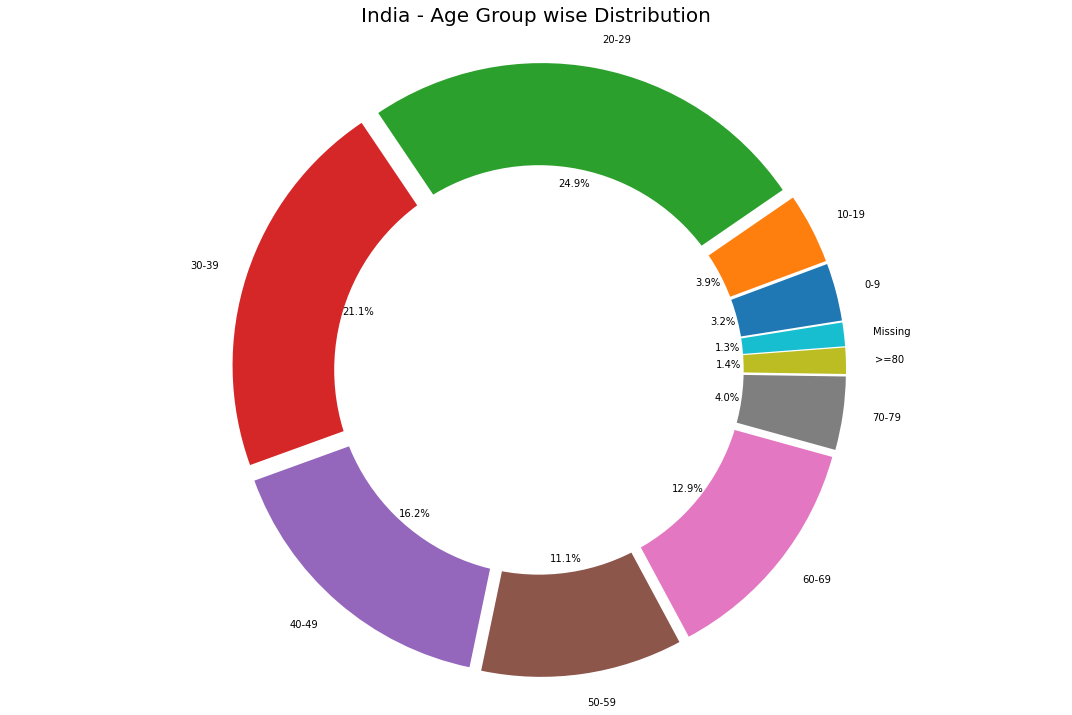

In [ ]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

We could see that the age group <40 is the most affected which is against the trend which says elderly people are more at risk of being affected. Only 17% of people >60 are affected.

In [ ]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

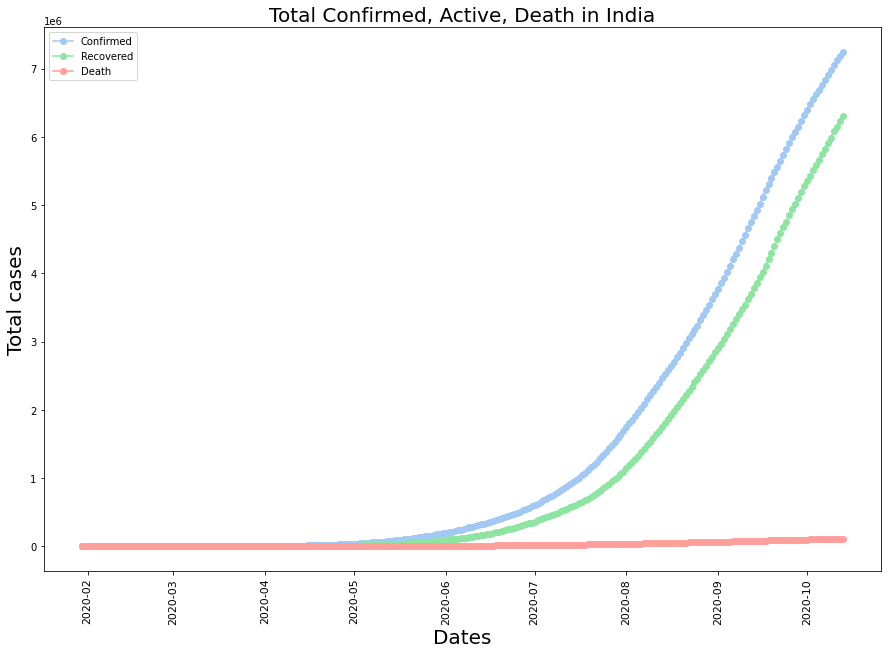

In [ ]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

###Total Samples Tested

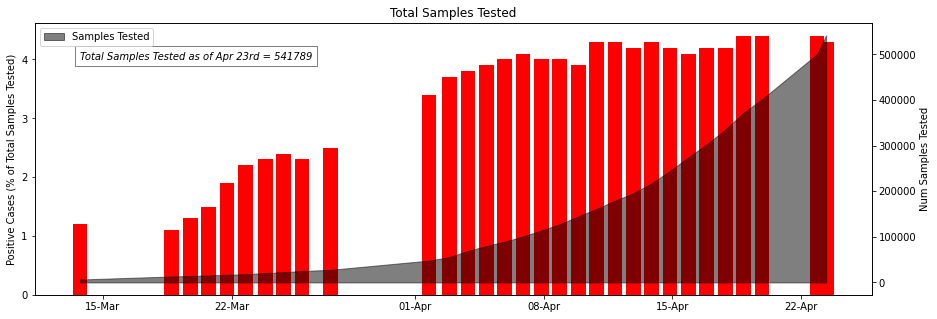

In [ ]:
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()

###Day-by-Day Confirmed Cases in Top 15 States in India

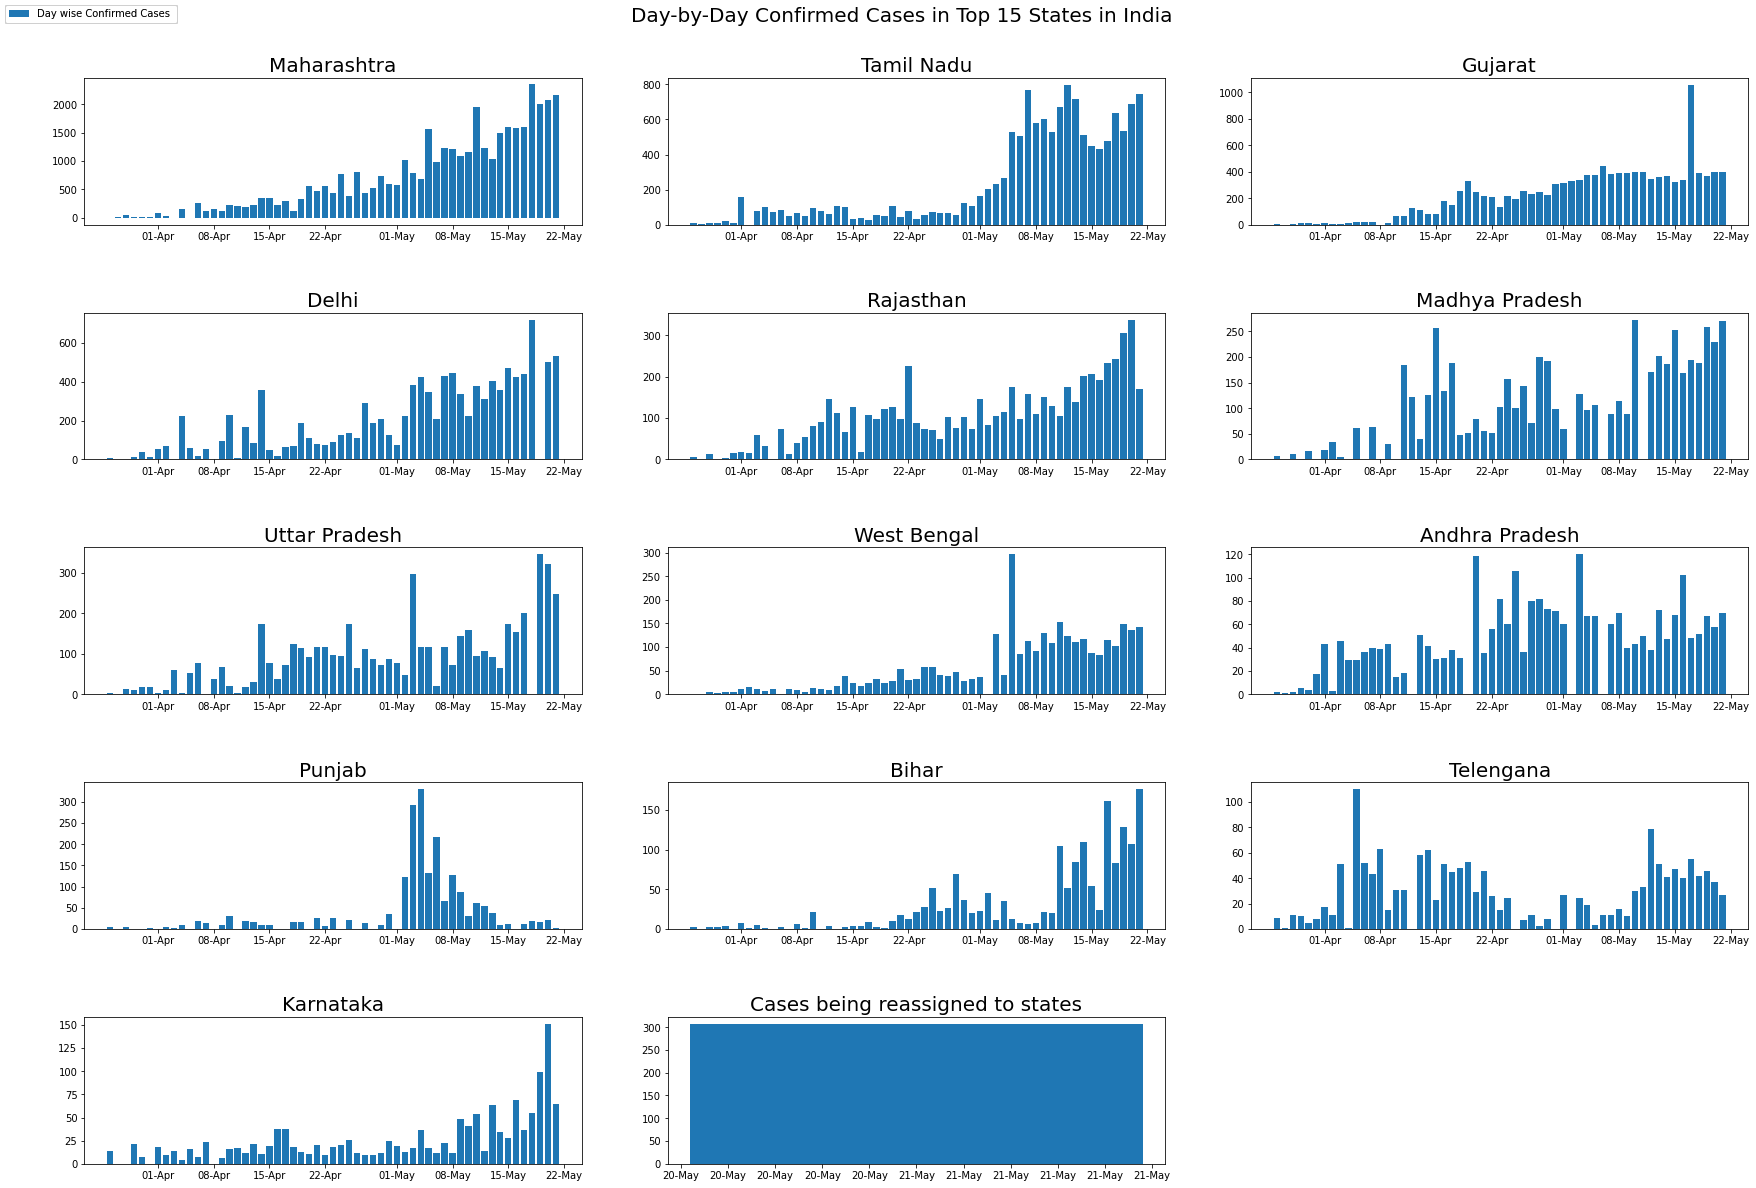

In [ ]:
all_state = list(df_India['State/UnionTerritory'].unique())

latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_dates = {}
states_active = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
fig = plt.figure(figsize= (25,17))
plt.suptitle('Day-by-Day Confirmed Cases in Top 15 States in India',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=5.0)

###Growth Rate in top 15 States in India

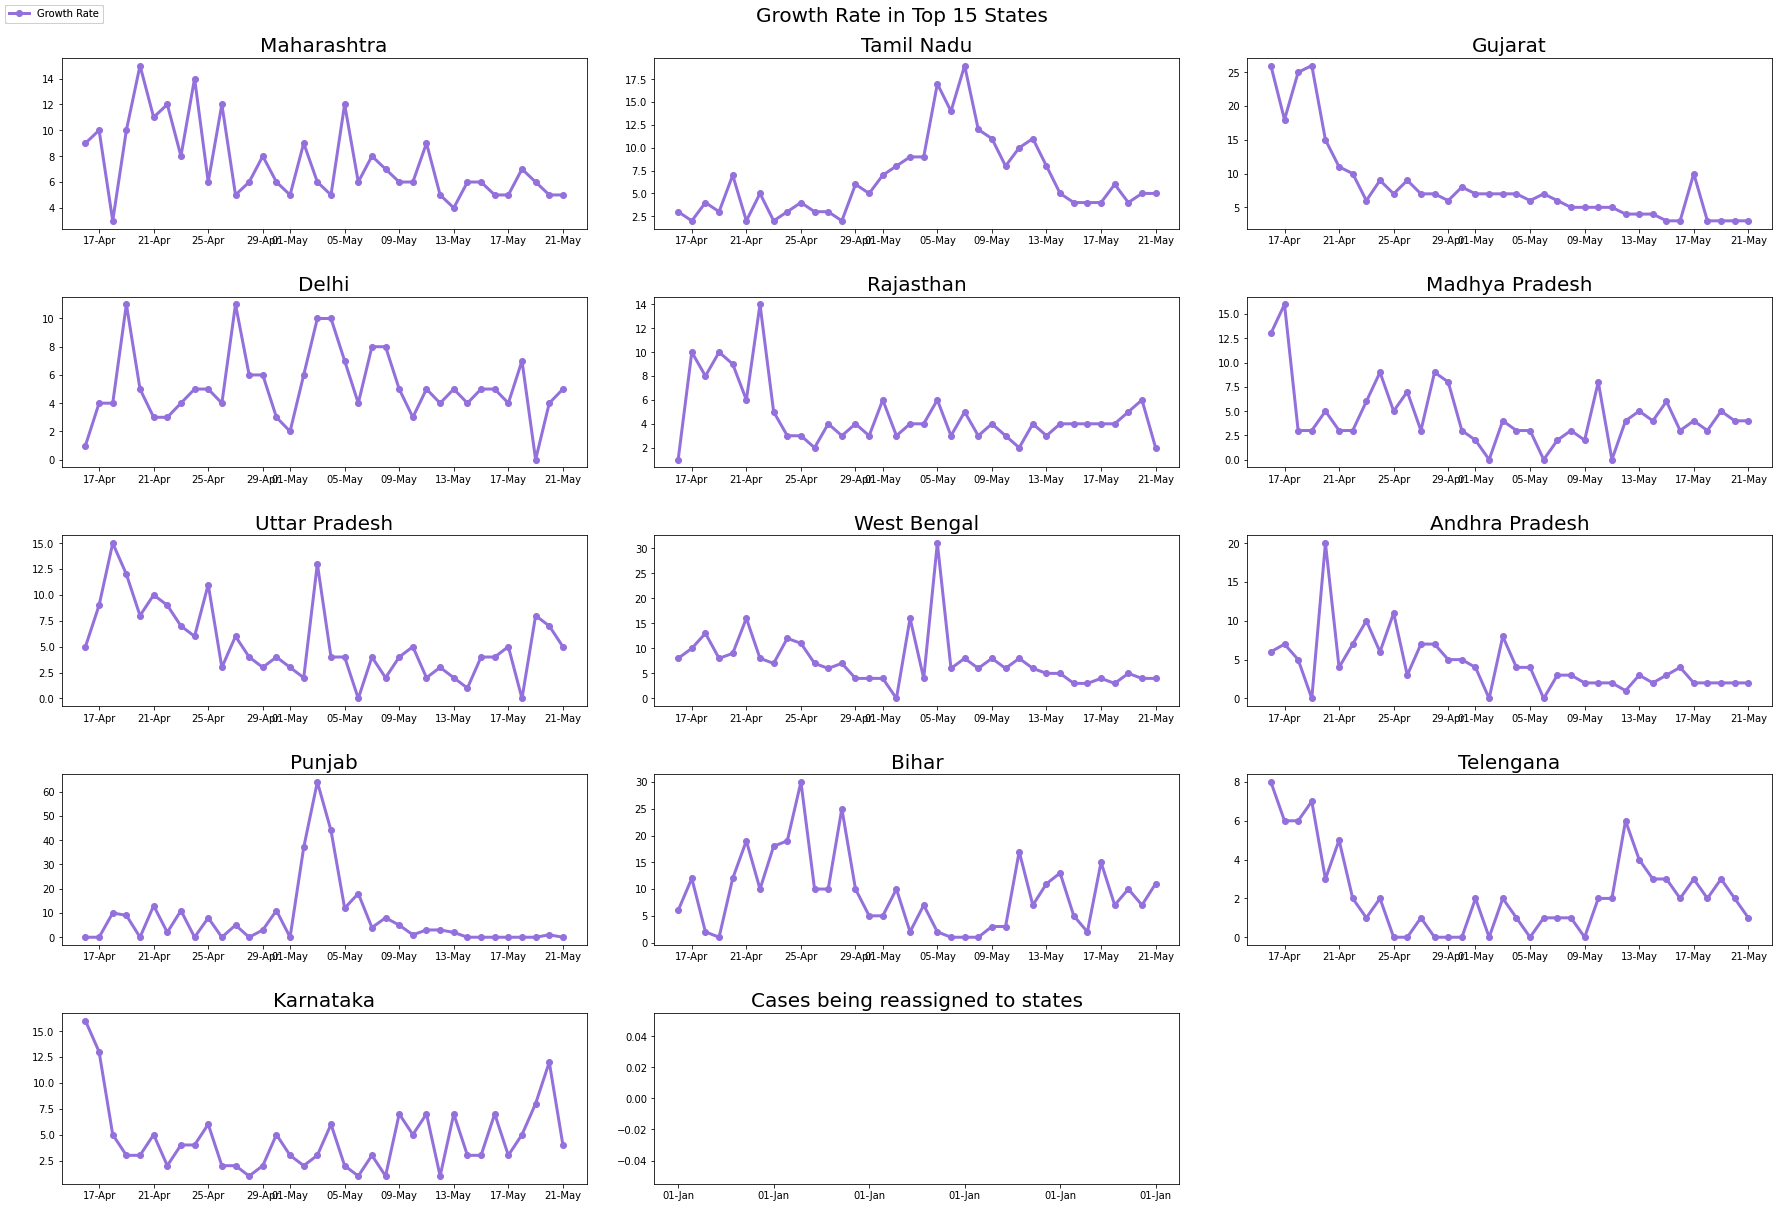

In [ ]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

Though being highly populated the relative confimred cases of India is low compared to other countries. This could be because of two reasons:
- 67 days lockdown imposed by prime minister Narendra Modi in several stages (Source : [Health Ministry](http://www.indiatoday.in/india/story/without-lockdown-india-would-have-2-lakh-covid-19-cases-by-now-health-ministry-1665903-2020-04-11))
- Low testing rate (Source: [news18](https://www.news18.com/news/india/with-just-18-tests-per-million-of-population-why-indias-low-testing-rate-for-coronavirus-is-worrying-2552845.html))

###Exploring different types of hospital beds available in India during lockdown

In [ ]:
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

hospital_beds = hospital_beds.drop('Sno',axis=1)

In [ ]:
hospital_beds.head(36)

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


###Exploring top 10 States in each health facilities

In [ ]:
hospital_beds.NumPrimaryHealthCenters_HMIS = hospital_beds.NumPrimaryHealthCenters_HMIS.str.replace(',','')
hospital_beds.NumPrimaryHealthCenters_HMIS = hospital_beds.NumPrimaryHealthCenters_HMIS.astype(int)

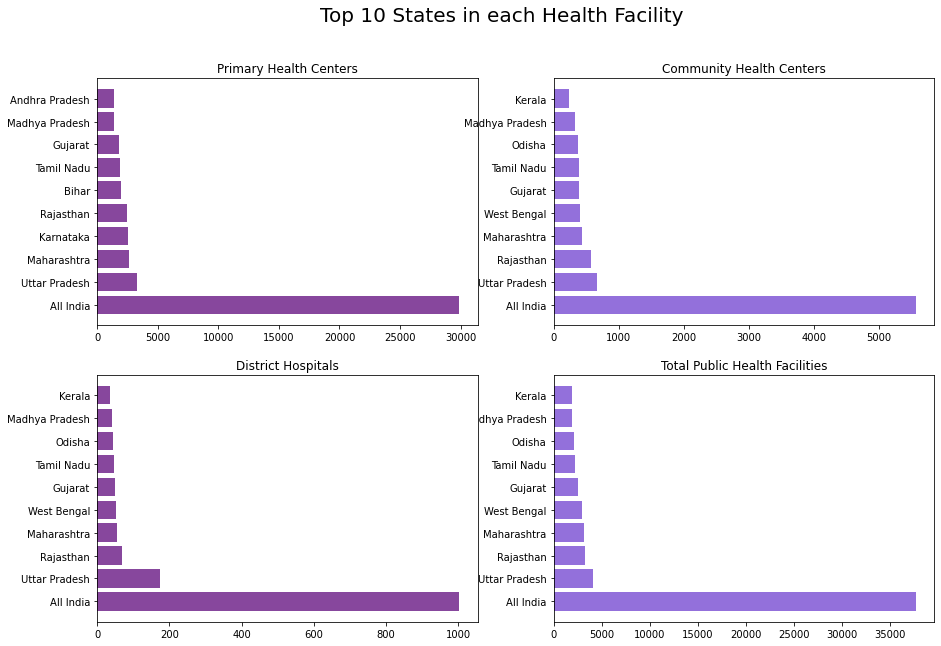

In [ ]:
top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');

###Exploring Urban and Rural Healthcare Facility

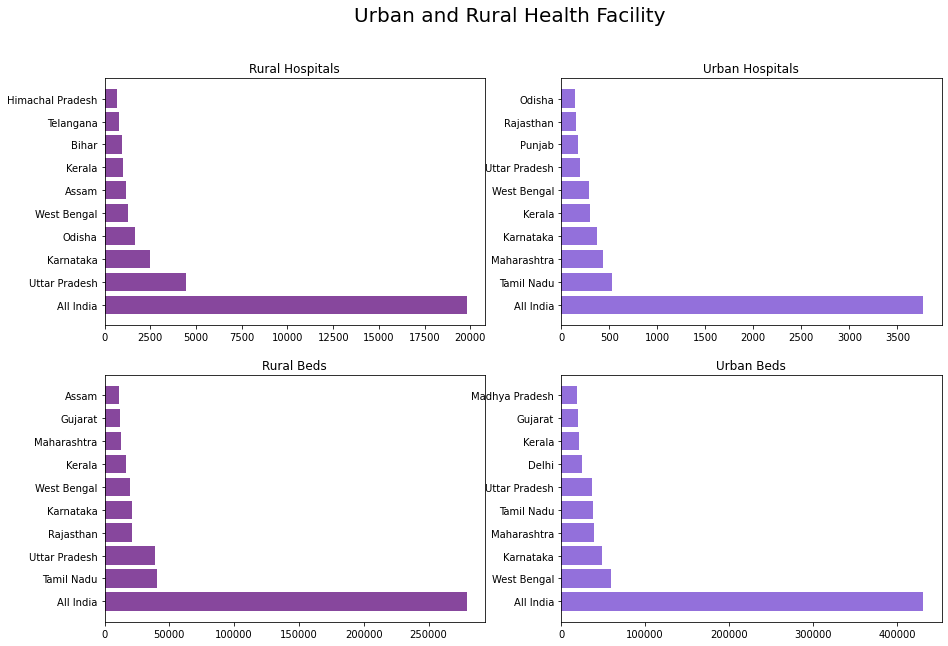

In [ ]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

###Exploring Statewise Testing Insights

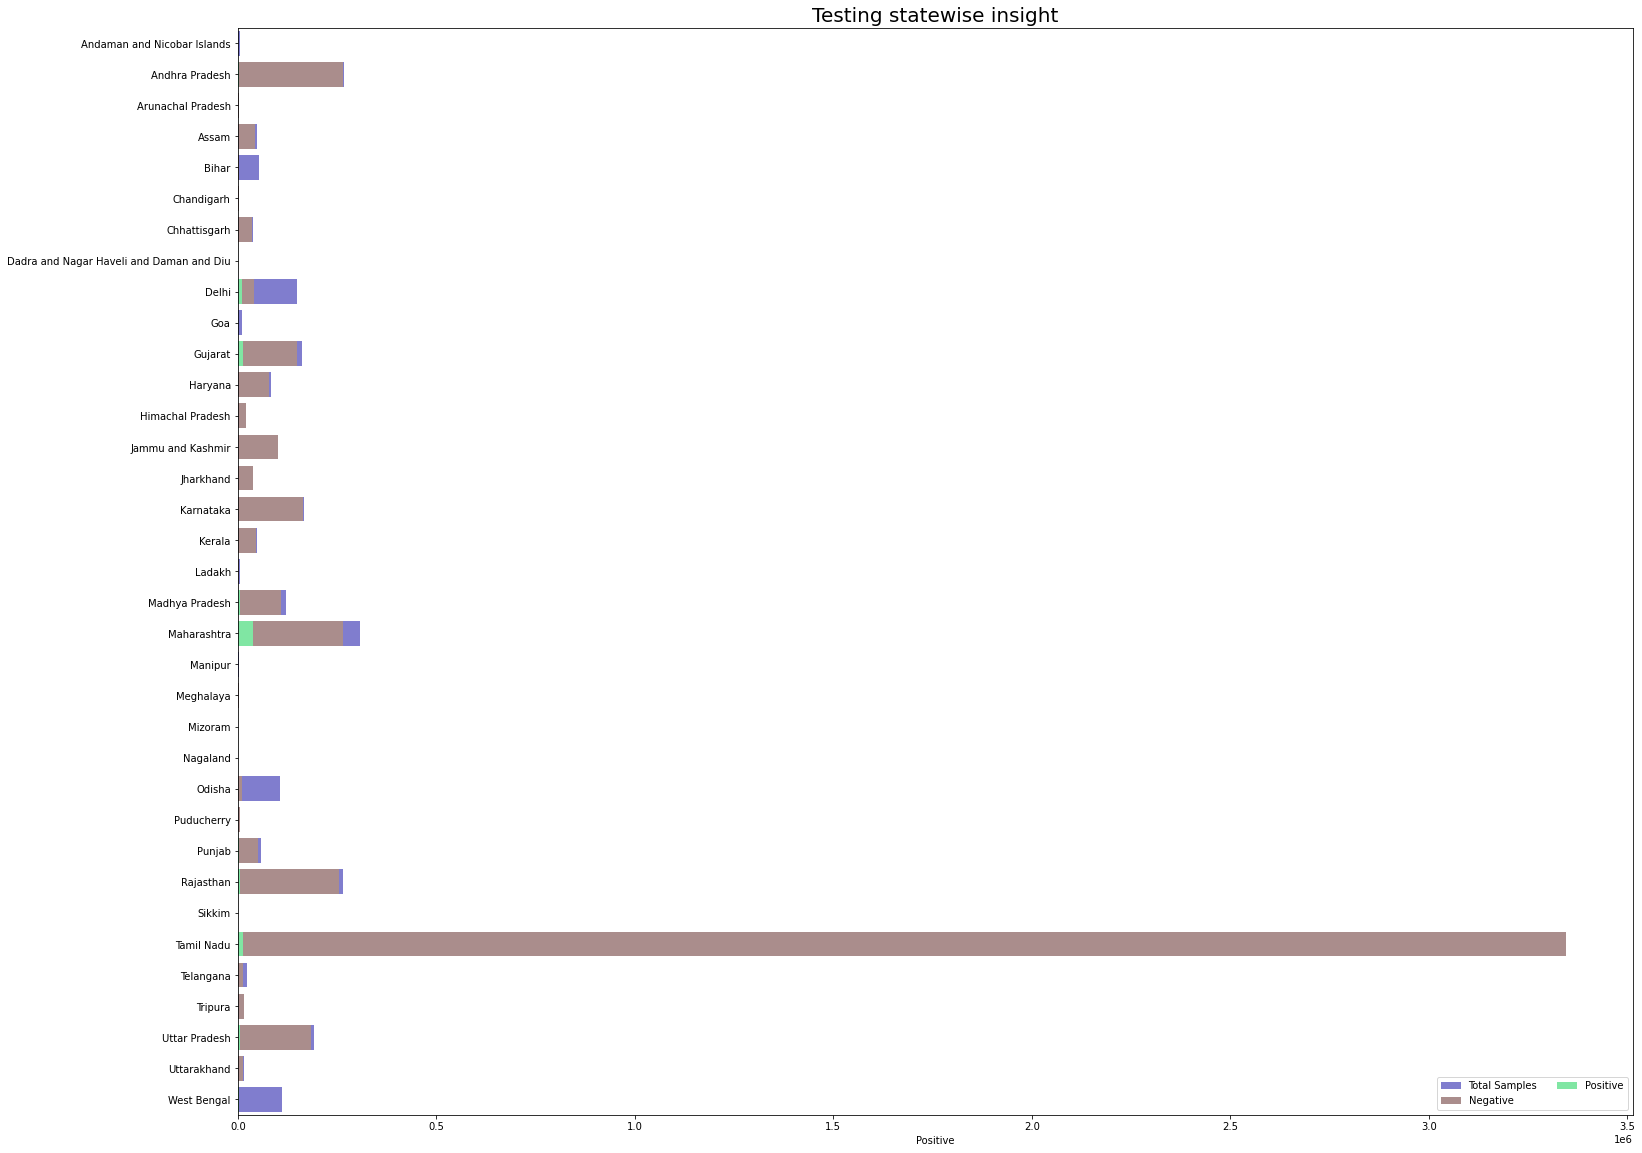

In [ ]:
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(25,20))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#7370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#af8887')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#6ff79d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

###Number of ICMR Testing Centres in each state

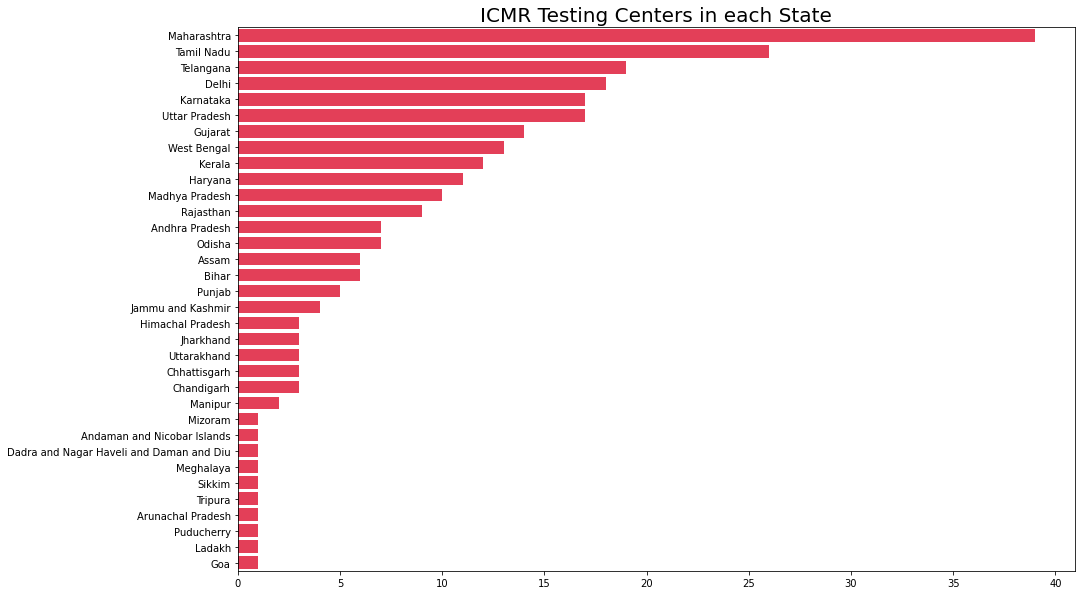

In [ ]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

##Let's Start with the predictions

In [ ]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])


## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
!pip install Prophet

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
confirmed = data.copy()
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])


##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
prop = Prophet(interval_width=0.95)
prop.fit(data)
future = prop.make_future_dataframe(periods=15)
future.tail(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
266,2020-10-14
267,2020-10-15
268,2020-10-16
269,2020-10-17
270,2020-10-18
271,2020-10-19
272,2020-10-20
273,2020-10-21
274,2020-10-22
275,2020-10-23


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
276,2020-10-24,8.270707e+06,8.195415e+06,8.351698e+06
277,2020-10-25,8.353541e+06,8.273492e+06,8.436345e+06
278,2020-10-26,8.433215e+06,8.343225e+06,8.518953e+06
279,2020-10-27,8.515106e+06,8.421221e+06,8.612717e+06
280,2020-10-28,8.602804e+06,8.500356e+06,8.705929e+06


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

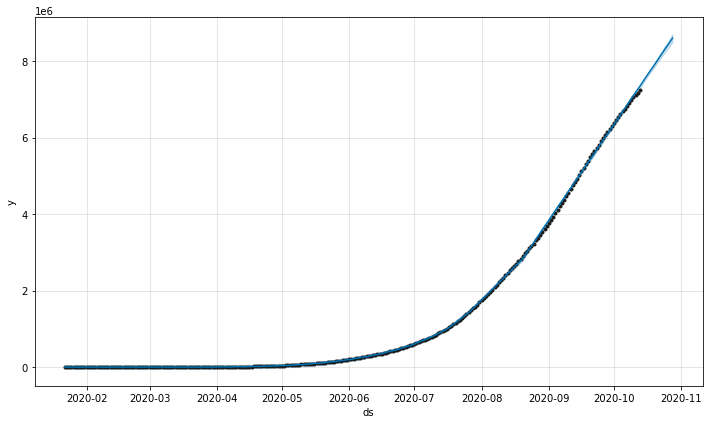

In [ ]:
confirmed_forecast_plot = prop.plot(forecast)

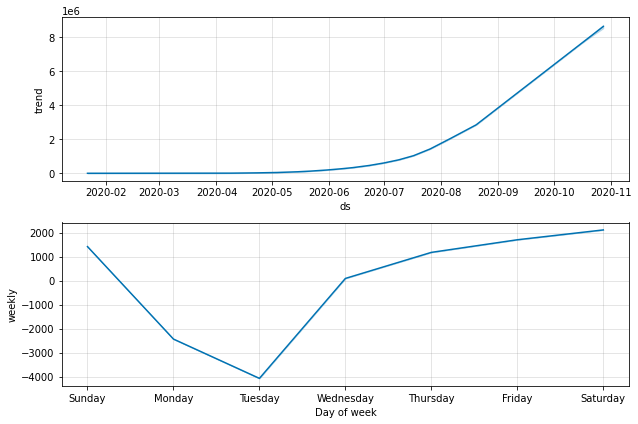

In [ ]:
confirmed_forecast_plot =prop.plot_components(forecast)

##ARIMA Model

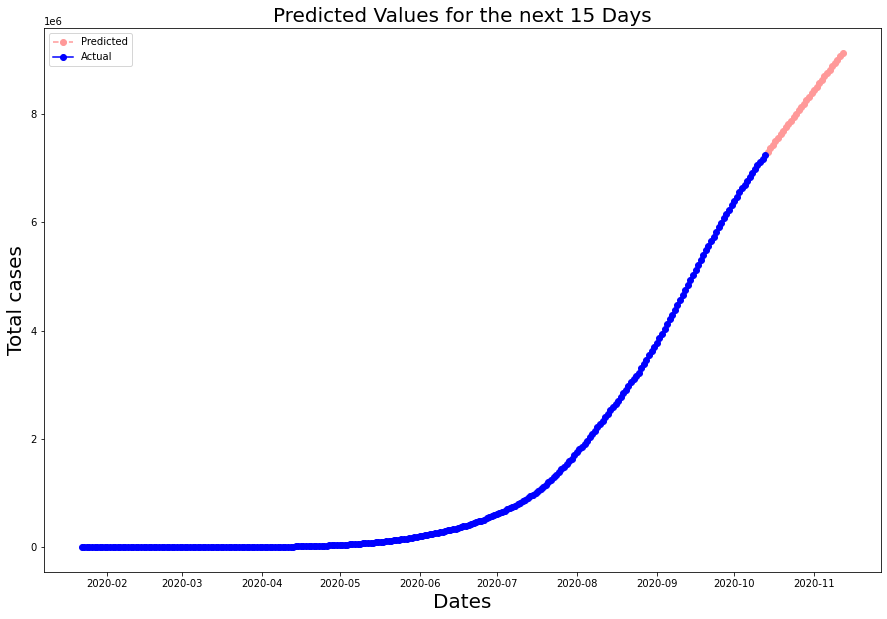

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

## 1.4 Visualising the spread geographically

In [ ]:
# Learn how to use folium to create a zoomable map
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_india['Latitude'], df_india['Longitude'], df_india['Confirmed'], df_india['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0002, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

#Part 3:  Exploring World wide data


## 3.1 Visualizing: Worldwide NCOVID-19 cases  

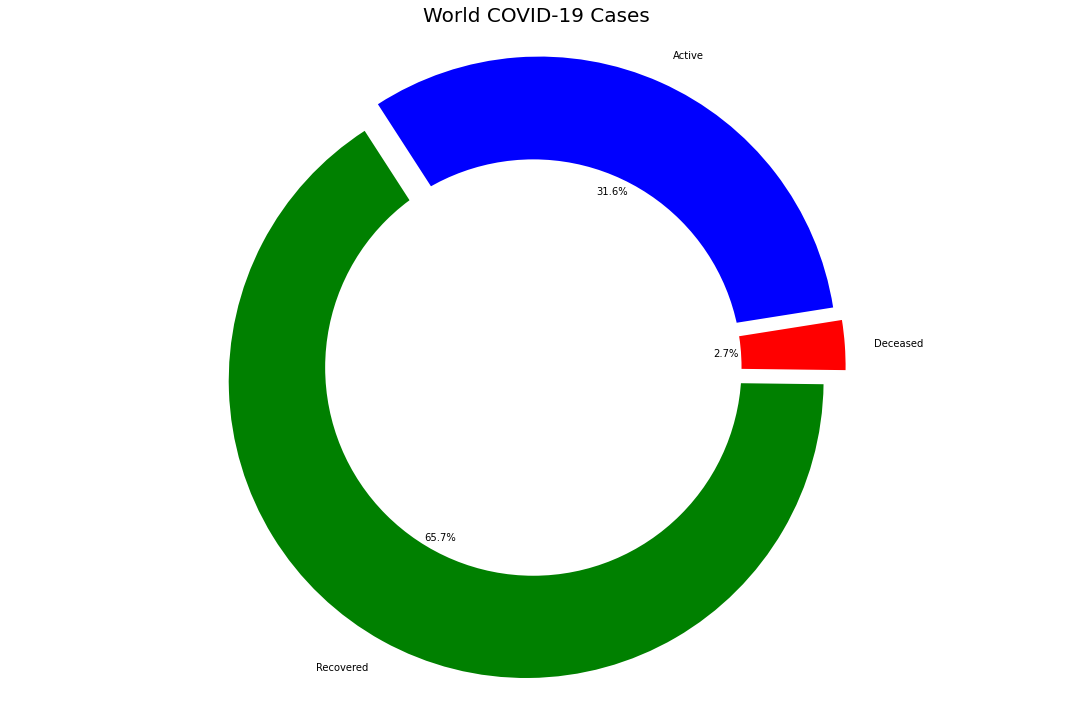

In [ ]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
dates

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-

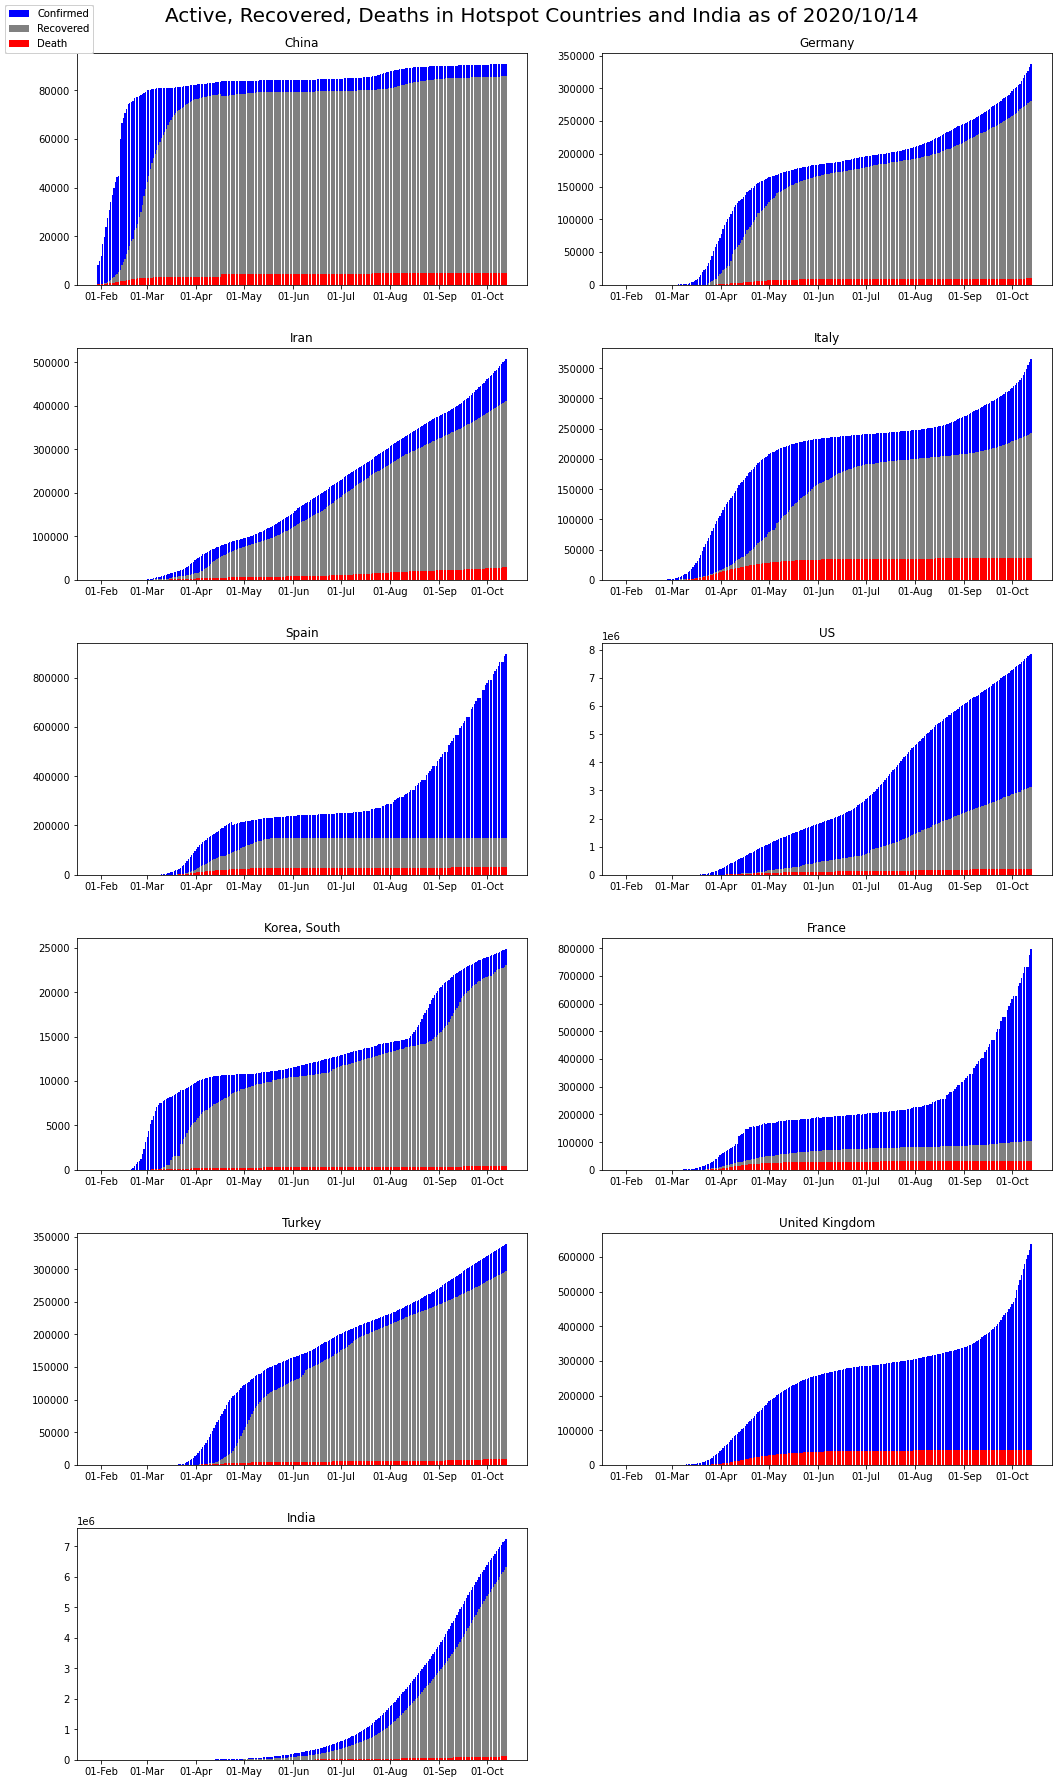

In [ ]:
hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
# for country in hotspots:
#     k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
#     global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    # ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [ ]:
countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

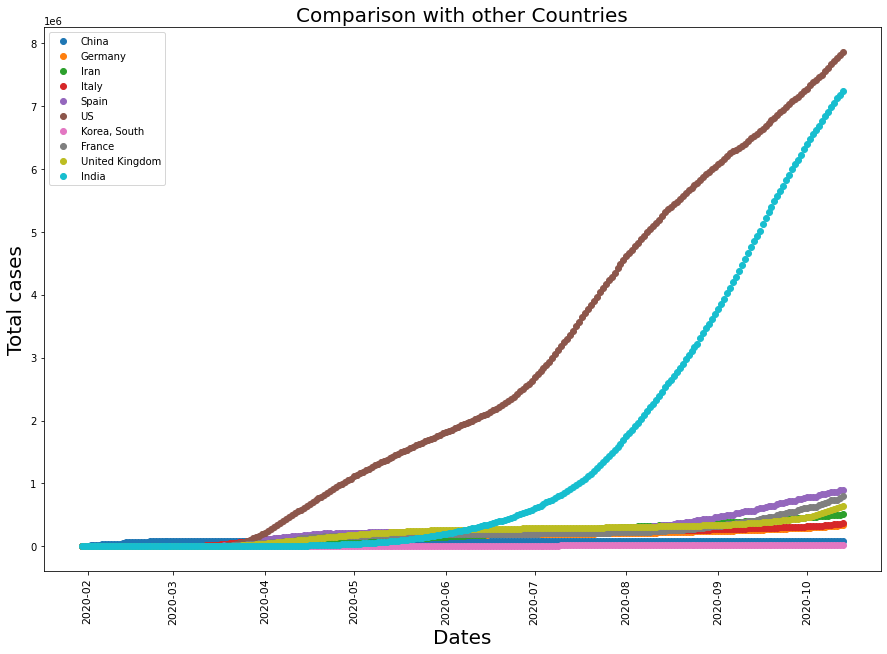

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

#**Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
- https://www.worldometers.info/coronavirus/#countries
- https://api.covid19india.org/